# Hands-On

Você foi designado para realizar a limpeza e preparação de dados de dois conjuntos de dados (base1.csv e base2.csv) distintos que representam informações relacionadas a risco de crédito.

Seu objetivo é ler os dois conjuntos de dados usando a biblioteca Pandas, realizar a concatenação dos dados, lidar com valores duplicados e faltantes, além de verificar a presença de outliers nos dados combinados.

____

## Passos a serem seguidos:

1. **Leitura dos Arquivos:** Utilize a biblioteca Pandas para ler os dois arquivos de dados: 'base1.csv' e 'base2.csv', que estão no diretório datasets, no repositório do módulo.
2. **Concatenação dos Dados:** Concatene os dois conjuntos de dados em um único DataFrame, verificando se os dados possuem a mesma estrutura para uma concatenação adequada.
3. **Tratamento de Dados Duplicados:** Verifique se há linhas duplicadas no DataFrame combinado e remova-as, mantendo a primeira ocorrência.
4. **Tratamento de Valores Faltantes:** Identifique e lide com os valores faltantes no DataFrame combinado. Preencha os valores ausentes com estratégias apropriadas (média, mediana, valor específico etc.) dependendo do contexto dos dados.
5. **Verificação de Outliers:** Utilize métodos estatísticos ou gráficos (como boxplots) para identificar a presença de outliers nos dados. Considere se eles são significativos para a análise ou se precisam ser tratados de alguma forma.

In [1]:
import pandas as pd
import numpy as np

Leitura dos Arquivos: Utilize a biblioteca Pandas para ler os dois arquivos de dados: 'base1.csv' e 'base2.csv', que estão no diretório datasets, no repositório do módulo.

In [2]:
df_base1 = pd.read_csv('base1.csv')
df_base2 = pd.read_csv('base2.csv')

df_base1.drop(df_base1.columns[[0,1]], axis=1, inplace=True)
df_base2.drop(df_base2.columns[[0,1]], axis=1, inplace=True)


# Nova seção

Concatenação dos Dados: Concatene os dois conjuntos de dados em um único DataFrame, verificando se os dados possuem a mesma estrutura para uma concatenação adequada

In [3]:
df_base_concatenada = pd.concat([df_base1,df_base2], ignore_index=True)

df_base_concatenada

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,26,male,2,rent,NaN,NaN,2445,12,car,good
1,61,male,2,free,NaN,moderate,1239,18,education,good
2,50,male,2,rent,quite rich,NaN,1236,6,car,good
3,42,male,2,free,NaN,NaN,10477,36,car,good
4,26,female,2,own,little,rich,3749,24,furniture/equipment,good
...,...,...,...,...,...,...,...,...,...,...
995,32,male,2,own,NaN,NaN,7238,48,radio/TV,good
996,38,male,2,free,NaN,moderate,6681,48,business,good
997,20,female,2,rent,NaN,NaN,4675,12,car,good
998,30,male,3,own,little,little,1823,24,radio/TV,bad


Tratamento de Dados Duplicados: Verifique se há linhas duplicadas no DataFrame combinado e remova-as, mantendo a primeira ocorrência

In [4]:
df_base_concatenada.loc[df_base_concatenada.duplicated()]

#dataframe vazio significa que não existem linhas duplicadas

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk


In [5]:
df_base_sem_duplicada = df_base_concatenada.drop_duplicates()
#apaga linhas duplicadas (toda a linha sendo verificada)
df_base_sem_duplicada

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,26,male,2,rent,NaN,NaN,2445,12,car,good
1,61,male,2,free,NaN,moderate,1239,18,education,good
2,50,male,2,rent,quite rich,NaN,1236,6,car,good
3,42,male,2,free,NaN,NaN,10477,36,car,good
4,26,female,2,own,little,rich,3749,24,furniture/equipment,good
...,...,...,...,...,...,...,...,...,...,...
995,32,male,2,own,NaN,NaN,7238,48,radio/TV,good
996,38,male,2,free,NaN,moderate,6681,48,business,good
997,20,female,2,rent,NaN,NaN,4675,12,car,good
998,30,male,3,own,little,little,1823,24,radio/TV,bad


Tratamento de Valores Faltantes: Identifique e lide com os valores faltantes no DataFrame combinado. Preencha os valores ausentes com estratégias apropriadas (média, mediana, valor específico etc.) dependendo do contexto dos dados

In [8]:
df_base_sem_duplicada.info()

#identificando onde estão os valores faltantes, nesse caso nas colunas 'Saving accounts' e 'Checking account' já que o info mostra menos valores non-null

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [16]:
#completando os valores nulos nas colunas 'Saving accounts' e 'Checking account' com o valor médio 'moderate'

df_base_sem_duplicada['Saving accounts'].fillna(value='moderate',inplace=True)
df_base_sem_duplicada['Checking account'].fillna(value='moderate',inplace=True)
#df_base_sem_nulo
#df_base_sem_nulo = df_base_sem_nulo['Checking account'].fillna('moderate')

In [17]:
df_base_sem_duplicada.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


Verificação de Outliers: Utilize métodos estatísticos ou gráficos (como boxplots) para identificar a presença de outliers nos dados. Considere se eles são significativos para a análise ou se precisam ser tratados de alguma forma

In [18]:
import matplotlib.pyplot as plt

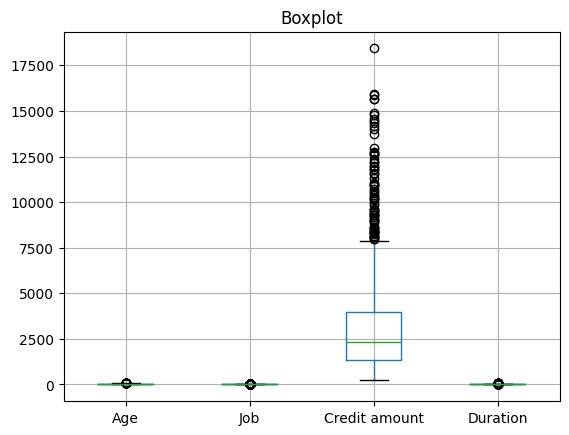

In [25]:
df_base_sem_duplicada.boxplot()
plt.title('Boxplot')
plt.show()

#Pelo gráfico de Boxplot a coluna 'Credit amount' apresenta vários valores outliers
#Nas outras colunas os valores outliers podem ocorrer e não parecem errados para a análise

In [37]:
#função que identifica as linhas com valores outliers de uma coluna

def identificando_outliers(df, coluna):
  #calculando quartis
  Q1 = df[coluna].quantile(0.25)
  Q3 = df[coluna].quantile(0.75)

  #intervalor interquartil
  IQR = Q3 - Q1

  #limites superior e inferior
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR

  #identificando as linhas outliers a partir da coluna parametro da função
  outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]

  return outliers

In [38]:
df_dados_outliers = identificando_outliers(df_base_sem_duplicada,'Credit amount')
display(df_dados_outliers)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
3,42,male,2,free,moderate,moderate,10477,36,car,good
6,29,male,2,rent,little,little,11816,45,business,bad
9,42,male,3,own,little,moderate,10366,60,car,good
37,28,male,3,rent,little,moderate,9398,36,car,bad
42,30,male,3,own,moderate,moderate,11054,36,car,good
...,...,...,...,...,...,...,...,...,...,...
914,37,male,2,own,moderate,moderate,10222,48,radio/TV,good
936,32,male,2,rent,moderate,moderate,11760,39,education,good
940,43,male,3,own,little,little,15857,36,vacation/others,good
967,42,male,3,own,moderate,moderate,8086,36,car,bad


In [39]:
#novo dataframe limpo das linhas com valores outliers

df_final = df_base_sem_duplicada.drop(df_dados_outliers.index)

display(df_final)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,26,male,2,rent,moderate,moderate,2445,12,car,good
1,61,male,2,free,moderate,moderate,1239,18,education,good
2,50,male,2,rent,quite rich,moderate,1236,6,car,good
4,26,female,2,own,little,rich,3749,24,furniture/equipment,good
5,20,female,2,own,little,moderate,1967,24,radio/TV,good
...,...,...,...,...,...,...,...,...,...,...
995,32,male,2,own,moderate,moderate,7238,48,radio/TV,good
996,38,male,2,free,moderate,moderate,6681,48,business,good
997,20,female,2,rent,moderate,moderate,4675,12,car,good
998,30,male,3,own,little,little,1823,24,radio/TV,bad
